In [4]:
import h2o
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from sklearn.metrics import accuracy_score

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.3 (build 10.0.1+10, mixed mode)
  Starting server from C:\Users\N1\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\N1\AppData\Local\Temp\tmp98ikmni5
  JVM stdout: C:\Users\N1\AppData\Local\Temp\tmp98ikmni5\h2o_N1_started_from_python.out
  JVM stderr: C:\Users\N1\AppData\Local\Temp\tmp98ikmni5\h2o_N1_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Europe/Helsinki
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.3
H2O cluster version age:,11 days
H2O cluster name:,H2O_from_python_N1_fkngj7
H2O cluster total nodes:,1
H2O cluster free memory:,1.971 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


In [72]:
#data = h2o.import_file("datascore100.csv")

In [167]:
data = pd.read_csv("DataScoreObjects100.csv")
data2 = pd.read_csv("datascore100.csv")
data = data.drop(["category","Unnamed: 0"], axis = 1)
data2 = data2.drop(["Unnamed: 0"], axis = 1)
print(data.shape, data2.shape)
data = data2.merge(data, how = "left", left_on = "paths", right_on = "paths")
data = h2o.H2OFrame.from_python(data)

(826, 114) (928, 984)
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [10]:
#delete null labels for not vectorized data

nan_frame = data.isna().group_by(by = ['isNA(labels)']).count().get_frame()
nan_frame

In [5]:
data = data.na_omit()
data.group_by(by = "category").count().get_frame()

category,nrow
automotive,91
beauty,91
digital_electronics,88
kids,91
man,90
military,91
perfumes,94
shoes,96
sport,93
woman,91


In [52]:
# use if data in not vectorized yet

def preprocessor(line):
    return line.lower()

vectorizer = CountVectorizer(preprocessor = preprocessor, stop_words = "english")
vectorized = vectorizer.fit_transform(data.as_data_frame()["labels"]).todense()

data_labels = h2o.H2OFrame.from_python(pd.DataFrame(data=vectorized, columns=sorted(vectorizer.vocabulary_)))

In [142]:
data.head()

3d modeling,Abdomen,Acrobatics,Action figure,Action-adventure game,Adaptation,Admiral,Adventure,Advertising,Aerialist,Aerospace engineering,Afro,Aftershave,Air force,Aircraft,Airman,Airplane_x,Airsoft,Album cover,Alcoholic beverage,Alloy wheel,Alpine skiing,American football cleat,Amusement park,Animal sports,Animated cartoon,Animation,Ankle,Aqua,Archery,Architecture,Arena,Arena football,Arm,Army,Army men,Art,Artificial turf,Artistic gymnastics,Artwork,Assembly line,Aston martin dbs v12,Athlete,Athletic dance move,Athletic shoe,Athletics,Atlas,Atmosphere,Atmospheric phenomenon,Audi,Audi r8,Audience,Audio engineer,Audio equipment,Auto mechanic,Auto part,Auto show,Automobile repair shop,Automotive design,Automotive engine part,Automotive engine timing part,Automotive exterior,Automotive fog light,Automotive lighting,Automotive super charger part,Automotive tire,Automotive wheel system,Automotive window part,Autumn,Aviation,Axle part,Azure,Baby,Baby & toddler clothing,Baby & toddler shoe,Baby food,Baby playing with toys,Backlighting,Badminton,Balance,Ball_x,Ball game,Ball pit,Ballet flat,Ballet shoe,Balloon_x,Bandy,Banner,Barechested,Barware,Basic pump,Basketball_x,Basketball court,Basketball moves,Basketball shoe,Bat-and-ball games,Beaker,Beanie,Beard,Bearing,Beauty,Bedtime,Beige,Biathlon,Bicycle_x,Bicycle clothing,Bicycle frame,Bicycle helmet_x,Bicycle racing,Bicycles--Equipment and supplies,Big cats,Birth,Birthday,Birthday party,Black,Black hair,Black-and-white,Blackboard,Blazer,Blended malt whisky,Blended whiskey,Blond,Blue,Bmw,Boardsport,Boat_x,Boating,Bodybuilding,Boeing ch-47 chinook,Book,Book cover,Boot_x,Botany,Bottle_x,Bow and arrow_x,Bowl_x,Box_x,Boxing,Boxing equipment,Boxing glove,Boxing ring,Branch,Brand,Brassiere_x,Breadboard,Breaststroke,Bridal shoe,Bridle,Brown,Brown hair,Bumper,Bus,Business,Businessperson,Butterfly_x,Calendar,Calf,Calligraphy,Camera operator,Camouflage,Canidae,Cap,Capacitor,Car_x,Car seat,Carmine,Cartoon,Celebrating,Center console,Ceremony,Cg artwork,Championship,Cheek,Cheering,Chest,Child,Child art,Child model,Chin,Churchill tank,Cinematographer,Circle,Circuit component,Circuit prototyping,Citro?n,City,City car,Cityscape,Classic car,Cleat,Climbing shoe,Clip art,Close-up,Clothing_x,Cloud,Clutch part,Coach,Cobalt blue,Cocktail dress,Collar
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.802042,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.943528,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.987013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.673203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.611774,0,0,0.72284,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.899241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.91054,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.962301,0,0,0,0,0,0,0.918474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.937602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.955003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.7791,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.987013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [143]:
data.shape

(928, 1097)

In [168]:
# split data

splits = data.split_frame([0.9], seed = 1)
train = splits[0]
test = splits[1]

paths_train = train["paths"]
train = train.drop(["paths"])
paths_test = test["paths"]
test = test.drop(["paths"])

predictors = data.col_names.remove("category")
response = "category"

## Train first model

In [169]:
gbm_model = H2ORandomForestEstimator(distribution="multinomial", seed = 123)

In [170]:
gbm_model.train(predictors, response, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [171]:
gbm_model.summary().as_data_frame()

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,500.0,196810.0,1.0,20.0,15.788,2.0,60.0,26.23


In [172]:
# confusion_matrix for test/train data
gbm_model.confusion_matrix(test).as_data_frame()

,automotive,beauty,digital_electronics,kids,man,military,perfumes,shoes,sport,woman,Error,Rate
0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 8
1,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.100000,1 / 10
2,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 10
3,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 9
4,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.111111,1 / 9
5,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.000000,0 / 7
6,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.000000,0 / 6
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.000000,0 / 16
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.000000,0 / 8
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.142857,1 / 7


In [173]:
# error for train data

print("R2 error: {}".format(gbm_model.r2()))
print("MSE error: {}".format(gbm_model.mse()))
print("1 - MSE error: {}".format(1- gbm_model.mse()))

R2 error: 0.987250680527327
MSE error: 0.10488826300011489
1 - MSE error: 0.8951117369998851


In [174]:
# error for test data

test_model = gbm_model.model_performance(test)
print("R2 error: {}".format(test_model.r2()))
print("MSE error: {}".format(test_model.mse()))
print("1 - MSE error: {}".format(1 - test_model.mse()))

R2 error: 0.9887169548888395
MSE error: 0.0908229412707135
1 - MSE error: 0.9091770587292864


In [175]:
# accuracy score 

predictions = gbm_model.predict(test)["predict"][:,0].as_data_frame()
real = test["category"][:,0].as_data_frame()
#paths_test = paths.as_data_frame()
print("accuracy_score: {}".format(accuracy_score(real, predictions)))
for i in range(real.shape[0]):
    if real.iloc[i][0] != predictions.iloc[i][0]:
        print(real.iloc[i][0], predictions.iloc[i][0])
        print(paths_test[i,0])

drf prediction progress: |████████████████████████████████████████████████| 100%
accuracy_score: 0.9666666666666667
beauty woman
https://cdn.newsapi.com.au/image/v1/138da7d9f79d6ac4f943bf97d5b28d9d
woman beauty
https://images.askmen.com/1080x540/2017/01/06-044621-the_pitfalls_of_dating_a_married_woman.jpg
man kids
https://cdn.vox-cdn.com/uploads/chorus_image/image/63194205/dawnofman.0.jpg


## Do some feature engineering and selection here

In [19]:
#unuseful; random forest choose the dest feature on its own
# delete not important features with Kbest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

gbm_model = H2ORandomForestEstimator(distribution="multinomial", seed = 123)

X = train[train.col_names[:-1]].as_data_frame()  
y = train["category"].as_data_frame()    

acc = []
acc_score = 0

Kfrom = 10
Kto = 800
Kstep = 20

for k in range(Kfrom, Kto, Kstep):
    selection = SelectKBest(score_func=chi2, k=k)
    fit = selection.fit(X,y)
    new_X = selection.fit(X,y).transform(X)
    
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Features','Score']
    best_features = featureScores.nlargest(k,'Score')
    
    Ktrain = train[list(best_features["Features"])+["category"]]
    Ktest = test[list(best_features["Features"])+["category"]]

    Kpredictors = Ktrain.col_names[:-1]
    Kresponse = "category"
    
    gbm_model.train(Kpredictors, Kresponse, training_frame=Ktrain)

    predictions = gbm_model.predict(Ktest)["predict"][:,0].as_data_frame()
    real = Ktest["category"][:,0].as_data_frame()
    acc.append(accuracy_score(real, predictions))
    if (accuracy_score(real, predictions) > acc_score):
        print(k)
        acc_score = accuracy_score(real, predictions)
        new_train = Ktrain
        new_test = Ktest
    print("accuracy_score: {}".format(accuracy_score(real, predictions)))

drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
10
accuracy_score: 0.5617977528089888
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
30
accuracy_score: 0.7303370786516854
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
50
accuracy_score: 0.8314606741573034
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
accuracy_score: 0.7865168539325843
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
90
accuracy_score: 0.8651685393258427
drf

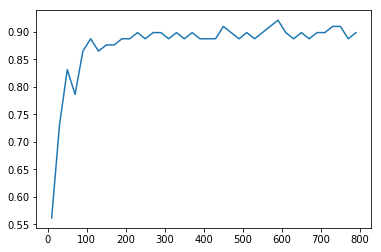

In [20]:
plt.plot(list(range(Kfrom, Kto, Kstep)), acc)
plt.show()

In [21]:
bestK = (acc.index(max(acc))+1)*Kstep - Kfrom
print("Leave only {} labels".format(bestK))

Leave only 590 labels


In [22]:
train = new_train
test = new_test

predictors = test.col_names[:-1]
response = "category"

## Tune parameters of the model

In [75]:
from h2o.grid.grid_search import H2OGridSearch

params = {'max_depth' : list(range(20,40,2))}
gbm_grid = H2ORandomForestEstimator(ntrees = 100, seed = 123)
grid = H2OGridSearch(gbm_grid, params,
                         grid_id = 'depth_grid')
grid.train(x = predictors, y = response, training_frame = train, validation_frame = test)

drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [76]:
grid.get_grid(sort_by = 'mse')

     max_depth            model_ids                  mse
0           28  depth_grid_model_14  0.12136299194538416
1           30  depth_grid_model_20  0.12144253827393725
2           26  depth_grid_model_13  0.12146095315679112
3           24  depth_grid_model_12   0.1216042139776856
4           32  depth_grid_model_21  0.12169154813064834
5           34  depth_grid_model_22  0.12192425353372302
6           36  depth_grid_model_23   0.1221906954972317
7           22  depth_grid_model_11   0.1224743756608249
8           38  depth_grid_model_24  0.12274254008243768
9           20  depth_grid_model_10  0.12348708526829077
10          18   depth_grid_model_9  0.12364744757214328
11          16   depth_grid_model_8  0.12579070238789075
12          14   depth_grid_model_7  0.12954423981948576
13          12   depth_grid_model_6  0.13668677971459892
14          10   depth_grid_model_5  0.14951772372507263
15           8   depth_grid_model_4  0.16978661991711352
16           6   depth_grid_mod

In [24]:
from h2o.grid.grid_search import H2OGridSearch

params = {'max_depth' : list(range(24,34,1)),
          "ntrees": [50,100,200,300],
          "histogram_type": ["uniform_adaptive", "random", "quantiles_global", "round_robin"]}

gbm_grid = H2ORandomForestEstimator(seed = 123, stopping_metric = "mse", max_runtime_secs = 5*60,
                                   keep_cross_validation_predictions = True)
grid = H2OGridSearch(gbm_grid, params,
                         grid_id = 'depth_grid')
grid.train(x = predictors, y = response, training_frame = train, validation_frame = test)

drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [28]:
final_grid = grid.get_grid(sort_by = 'mse')
best_model = h2o.get_model(final_grid.sorted_metric_table()['model_ids'][0])

In [31]:
# error for test data

test_model = best_model.model_performance(test)
print("R2 error: {}".format(test_model.r2()))
print("MSE error: {}".format(test_model.mse()))
print("1 - MSE error: {}".format(1 - test_model.mse()))

# accuracy score 

predictions = best_model.predict(test)["predict"][:,0].as_data_frame() #0.8488372093023255
real = test["category"][:,0].as_data_frame()
print("accuracy_score: {}".format(accuracy_score(real, predictions)))  

R2 error: 0.9863332474593643
MSE error: 0.11672210697815999
1 - MSE error: 0.88327789302184
drf prediction progress: |████████████████████████████████████████████████| 100%
accuracy_score: 0.9101123595505618
